# Модель распознавания изображений: кошки и собаки

## Подготовка исходных данных

In [2]:
import os, shutil
import keras

In [88]:
# Директория с распакованными изображениями
original_dataset_dir = '/home/jovyan/work/cats_and_dogs/train'

# Директория для сохранения части выборки, использованной в лекции
base_dir = '/home/jovyan/work/cats_and_dogs/cats_and_dogs_small'
os.mkdir(base_dir)

# Директории для обучающей, тестовой, валидационной подвыборок
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Директория с изображениями котов
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# Директория с изображениями собак
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# Директории с валидационными и тестовыми изображениями
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [89]:
# Выберем первые 1000 изображений котов для обучения и по 500 изображений для теста и валидации
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

In [90]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# То же с собаками
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

### Обучение базовой модели

In [92]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [93]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 15, 15, 128)      

In [94]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [95]:
from keras.preprocessing.image import ImageDataGenerator

# Нормализация изображений
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir, # Директория с изображениями обучающей выборки
        target_size=(150, 150), # Меняем размер на 150x150
        batch_size=32, # Размер мини-пакета
        class_mode='binary') # Двухклассовая классификация

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [96]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [97]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 104s 1s/step - loss: 0.6936 - acc: 0.5265 - val_loss: 0.7009 - val_acc: 0.5000
Epoch 2/30
100/100 [==============================] - 103s 1s/step - loss: 0.6680 - acc: 0.5910 - val_loss: 0.6491 - val_acc: 0.6380
Epoch 3/30
100/100 [==============================] - 103s 1s/step - loss: 0.6280 - acc: 0.6425 - val_loss: 0.6265 - val_acc: 0.6590
Epoch 4/30
100/100 [==============================] - 103s 1s/step - loss: 0.5974 - acc: 0.6815 - val_loss: 0.6677 - val_acc: 0.5930
Epoch 5/30
100/100 [==============================] - 103s 1s/step - loss: 0.5417 - acc: 0.7295 - val_loss: 0.6251 - val_acc: 0.6550
Epoch 6/30
100/100 [==============================] - 103s 1s/step - loss: 0.5127 - acc: 0.7515 - val_loss: 0.6022 - val_acc: 0.6740
Epoch 7/30
100/100 [==============================] - 103s 1s/step - loss: 0.4805 - acc: 0.7750 - val_loss: 0.6448 - val_acc: 0.6480
Epoch 8/30
100/100 [==============================] - 103s 1s/step - 

In [98]:
model.save('cats_and_dogs_small_1.h5')

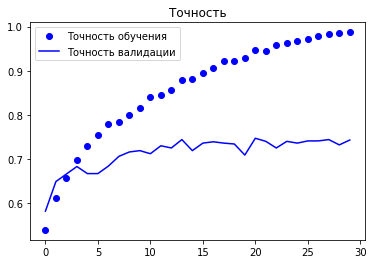

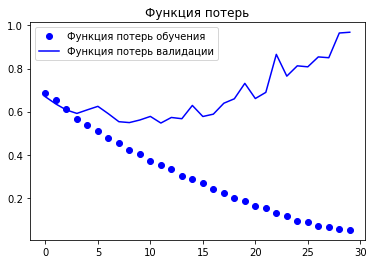

In [23]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Точность обучения')
plt.plot(epochs, val_acc, 'b', label='Точность валидации')
plt.title('Точность')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Функция потерь обучения')
plt.plot(epochs, val_loss, 'b', label='Функция потерь валидации')
plt.title('Функция потерь')
plt.legend()

plt.show()

### Аугментация

In [25]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

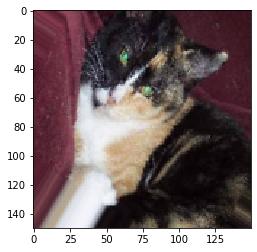

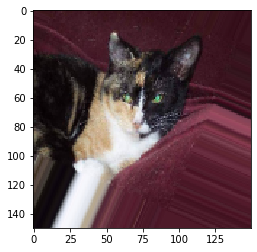

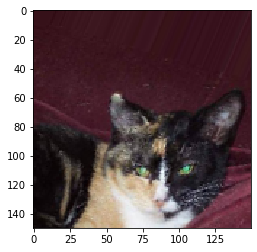

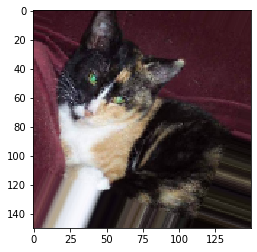

In [28]:
from keras.preprocessing import image
# Демонстрация аугментации на одном изображении
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[6]
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img) # Размерность (150, 150, 3)
x = x.reshape((1,) + x.shape) # Приводим к размерности (1, 150, 150, 3)
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [29]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [31]:
train_datagen = ImageDataGenerator( # Аугментация обучающей выборки
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255) # Для валидационной выборки аугментация не нужна

train_generator = train_datagen.flow_from_directory(
        train_dir, # Директория с изображениями обучающей выборки
        target_size=(150, 150), # Меняем размер на 150x150
        batch_size=32, # Размер мини-пакета
        class_mode='binary') # Двухклассовая классификация

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 167s 2s/step - loss: 0.6802 - acc: 0.5506 - val_loss: 0.6577 - val_acc: 0.5876
Epoch 2/30
100/100 [==============================] - 165s 2s/step - loss: 0.6518 - acc: 0.6044 - val_loss: 0.6203 - val_acc: 0.6598
Epoch 3/30
100/100 [==============================] - 167s 2s/step - loss: 0.6261 - acc: 0.6403 - val_loss: 0.6385 - val_acc: 0.6415
Epoch 4/30
100/100 [==============================] - 165s 2s/step - loss: 0.6101 - acc: 0.6672 - val_loss: 0.5817 - val_acc: 0.6862
Epoch 5/30
100/100 [==============================] - 166s 2s/step - loss: 0.6022 - acc: 0.6750 - val_loss: 0.6002 - val_acc: 0.6618
Epoch 6/30
100/100 [==============================] - 166s 2s/step - loss: 0.5884 - acc: 0.6703 - val_loss: 0.5550 - val_acc: 0.7010
Epoch 7/30
100/100 [==============================] - 166s 2s/step - loss: 0.5797 - acc: 0.6963 - val_loss: 0.6041 - v

In [32]:
model.save('cats_and_dogs_augment.h5')

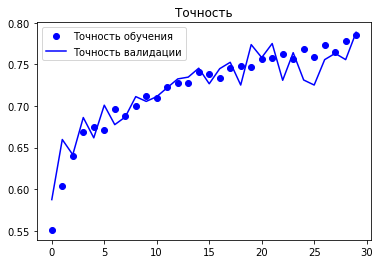

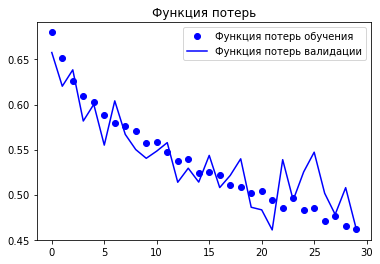

In [33]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Точность обучения')
plt.plot(epochs, val_acc, 'b', label='Точность валидации')
plt.title('Точность')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Функция потерь обучения')
plt.plot(epochs, val_loss, 'b', label='Функция потерь валидации')
plt.title('Функция потерь')
plt.legend()

plt.show()

### Аугментация + прореживание

In [34]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [35]:
train_datagen = ImageDataGenerator( # Аугментация обучающей выборки
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255) # Для валидационной выборки аугментация не нужна

train_generator = train_datagen.flow_from_directory(
        train_dir, # Директория с изображениями обучающей выборки
        target_size=(150, 150), # Меняем размер на 150x150
        batch_size=32, # Размер мини-пакета
        class_mode='binary') # Двухклассовая классификация

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 168s 2s/step - loss: 0.6951 - acc: 0.5087 - val_loss: 0.6904 - val_acc: 0.5006
Epoch 2/30
100/100 [==============================] - 166s 2s/step - loss: 0.6895 - acc: 0.5391 - val_loss: 0.6738 - val_acc: 0.5786
Epoch 3/30
100/100 [==============================] - 166s 2s/step - loss: 0.6776 - acc: 0.5716 - val_loss: 0.6532 - val_acc: 0.6206
Epoch 4/30
100/100 [==============================] - 165s 2s/step - loss: 0.6623 - acc: 0.5956 - val_loss: 0.6349 - val_acc: 0.6256
Epoch 5/30
100/100 [==============================] - 166s 2s/step - loss: 0.6486 - acc: 0.6159 - val_loss: 0.6041 - val_acc: 0.6669
Epoch 6/30
100/100 [==============================] - 166s 2s/step - loss: 0.6252 - acc: 0.6572 - val_loss: 0.5982 - val_acc: 0.6649
Epoch 7/30
100/100 [==============================] - 167s 2s/step - loss: 0.6087 - acc: 0.6628 - val_loss: 0.5700 - v

### Выделение признаков

In [99]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

In [100]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [40]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255) # Аугментацию не используем
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        # Пропускаем выборку через сверточную основу и сохраняем ответы
        features_batch = conv_base.predict(inputs_batch) 
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [43]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [45]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 3s 2ms/step - loss: 0.5980 - acc: 0.6675 - val_loss: 0.4364 - val_acc: 0.8410
Epoch 2/30
2000/2000 [==============================] - 3s 1ms/step - loss: 0.4284 - acc: 0.7990 - val_loss: 0.3636 - val_acc: 0.8500
Epoch 3/30
2000/2000 [==============================] - 3s 1ms/step - loss: 0.3598 - acc: 0.8345 - val_loss: 0.3348 - val_acc: 0.8550
Epoch 4/30
2000/2000 [==============================] - 3s 1ms/step - loss: 0.3203 - acc: 0.8605 - val_loss: 0.3057 - val_acc: 0.8740
Epoch 5/30
2000/2000 [==============================] - 3s 1ms/step - loss: 0.2827 - acc: 0.8875 - val_loss: 0.2817 - val_acc: 0.9000
Epoch 6/30
2000/2000 [==============================] - 3s 1ms/step - loss: 0.2584 - acc: 0.8985 - val_loss: 0.2747 - val_acc: 0.8870
Epoch 7/30
2000/2000 [==============================] - 3s 1ms/step - loss: 0.2428 - acc: 0.9030 - val_loss: 0.2641 - val_acc: 0.8950
Epoch 8/30
200

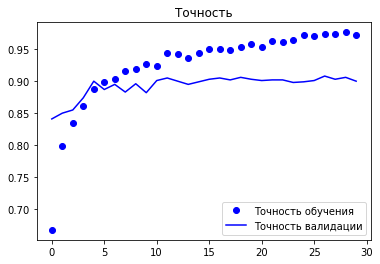

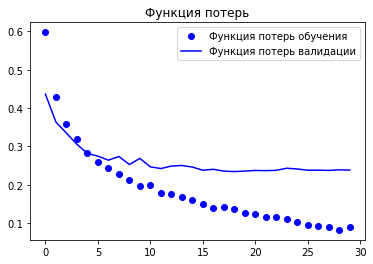

In [47]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Точность обучения')
plt.plot(epochs, val_acc, 'b', label='Точность валидации')
plt.title('Точность')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Функция потерь обучения')
plt.plot(epochs, val_loss, 'b', label='Функция потерь валидации')
plt.title('Функция потерь')
plt.legend()

plt.show()

### Выделение признаков с аугментацией данных

In [106]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [107]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_9 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_19 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [108]:
model.trainable_weights

[<tf.Variable 'dense_19/kernel:0' shape=(8192, 256) dtype=float32_ref>,
 <tf.Variable 'dense_19/bias:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'dense_20/kernel:0' shape=(256, 1) dtype=float32_ref>,
 <tf.Variable 'dense_20/bias:0' shape=(1,) dtype=float32_ref>]

In [109]:
conv_base.trainable = False

In [110]:
model.trainable_weights

[<tf.Variable 'dense_19/kernel:0' shape=(8192, 256) dtype=float32_ref>,
 <tf.Variable 'dense_19/bias:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'dense_20/kernel:0' shape=(256, 1) dtype=float32_ref>,
 <tf.Variable 'dense_20/bias:0' shape=(1,) dtype=float32_ref>]

In [111]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
 - 678s - loss: 0.5892 - acc: 0.6910 - val_loss: 0.4631 - val_acc: 0.8010
Epoch 2/30
 - 677s - loss: 0.4831 - acc: 0.7880 - val_loss: 0.3680 - val_acc: 0.8550
Epoch 3/30
 - 677s - loss: 0.4335 - acc: 0.8075 - val_loss: 0.3394 - val_acc: 0.8660
Epoch 4/30
 - 677s - loss: 0.4023 - acc: 0.8255 - val_loss: 0.3104 - val_acc: 0.8790
Epoch 5/30
 - 677s - loss: 0.3830 - acc: 0.8290 - val_loss: 0.2959 - val_acc: 0.8830
Epoch 6/30
 - 677s - loss: 0.3673 - acc: 0.8380 - val_loss: 0.2862 - val_acc: 0.8770
Epoch 7/30
 - 677s - loss: 0.3585 - acc: 0.8530 - val_loss: 0.2793 - val_acc: 0.8780
Epoch 8/30
 - 677s - loss: 0.3466 - acc: 0.8490 - val_loss: 0.2721 - val_acc: 0.8860
Epoch 9/30
 - 677s - loss: 0.3493 - acc: 0.8500 - val_loss: 0.2654 - val_acc: 0.8850
Epoch 10/30
 - 709s - loss: 0.3410 - acc: 0.8525 - val_loss: 0.2673 - val_acc: 0.8880
Epoch 11/30
 - 679s - loss: 0.3232 - acc: 0.8595 - val_loss: 0.26

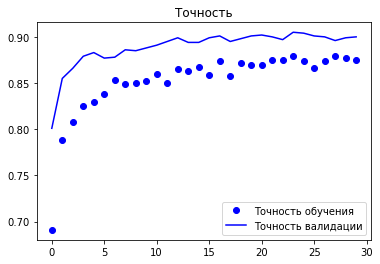

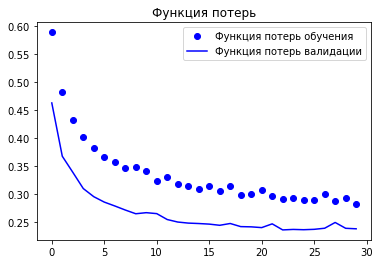

In [112]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Точность обучения')
plt.plot(epochs, val_acc, 'b', label='Точность валидации')
plt.title('Точность')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Функция потерь обучения')
plt.plot(epochs, val_loss, 'b', label='Функция потерь валидации')
plt.title('Функция потерь')
plt.legend()

plt.show()

### Дообучение

In [113]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [114]:
conv_base.trainable = True
for layer in conv_base.layers:
    if layer.name.find('block5_conv') >= 0:
        layer.trainable = True
    else:
        layer.trainable = False

In [115]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [116]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 767s 8s/step - loss: 0.2947 - acc: 0.8735 - val_loss: 0.2156 - val_acc: 0.9110
Epoch 2/30
100/100 [==============================] - 755s 8s/step - loss: 0.2635 - acc: 0.8825 - val_loss: 0.2127 - val_acc: 0.9180
Epoch 3/30
100/100 [==============================] - 758s 8s/step - loss: 0.2460 - acc: 0.8925 - val_loss: 0.2609 - val_acc: 0.8980
Epoch 4/30
100/100 [==============================] - 756s 8s/step - loss: 0.2201 - acc: 0.9110 - val_loss: 0.2234 - val_acc: 0.9180
Epoch 5/30
100/100 [==============================] - 757s 8s/step - loss: 0.2212 - acc: 0.9055 - val_loss: 0.1958 - val_acc: 0.9200
Epoch 6/30
100/100 [==============================] - 756s 8s/step - loss: 0.2042 - acc: 0.9140 - val_loss: 0.2176 - val_acc: 0.9200
Epoch 7/30
100/100 [==============================] - 756s 8s/step - loss: 0.1903 - acc: 0.9220 - val_loss: 0.1990 - val_acc: 0.9280
Epoch 8/30
100/100 [==============================] - 756s 8s/step - 

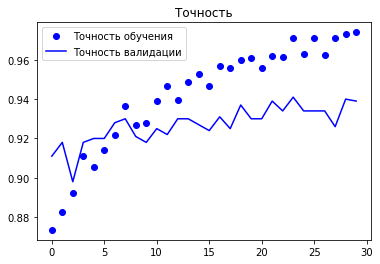

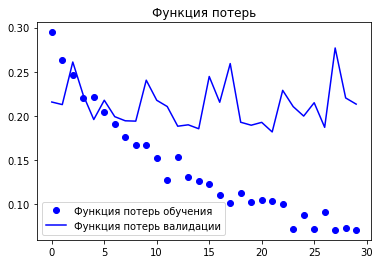

In [117]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Точность обучения')
plt.plot(epochs, val_acc, 'b', label='Точность валидации')
plt.title('Точность')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Функция потерь обучения')
plt.plot(epochs, val_loss, 'b', label='Функция потерь валидации')
plt.title('Функция потерь')
plt.legend()

plt.show()